# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing modules and libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')
#c1=cm.get_cmap('Paired')
c1=cm.get_cmap('jet')
from sklearn.preprocessing import LabelEncoder

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Loading Data</p>

In [2]:
data=pd.read_csv('/kaggle/input/iriscsv/Iris.csv')

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Cleaning</p>

In [3]:
data.duplicated().sum()

0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **No duplicates and Null Values in the Dataset**

In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Transformation</p>

In [6]:
LE=LabelEncoder()
sol=LE.fit_transform(np.array(data['Species']).reshape(-1,1))
data['Species_fmt']=sol

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Data Visualisation</p>

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Species Frequency</p>


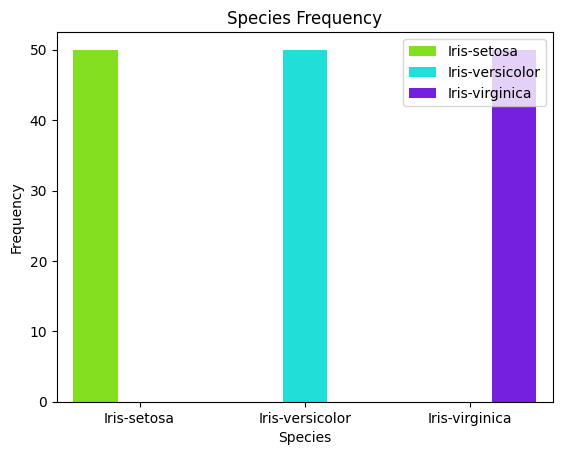

In [7]:
sb.countplot(data=data,x='Species',hue='Species',palette='hsv')
plt.ylabel('Frequency')
plt.title('Species Frequency')
plt.legend()
plt.show()

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Sepal Length Vs Sepal Width</p>


Text(0.5, 1.0, 'Sepal Length Vs Sepal Width')

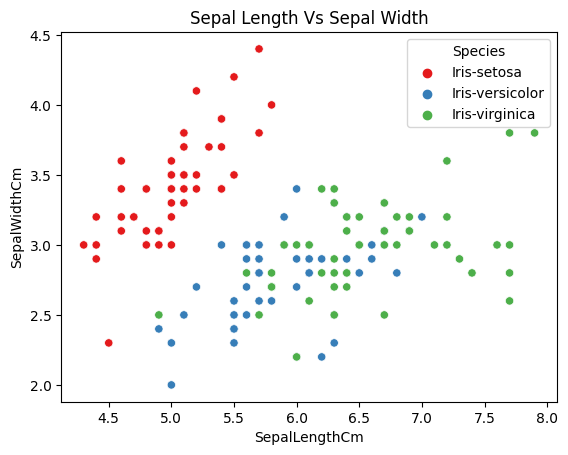

In [8]:
sb.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette='Set1')
plt.title('Sepal Length Vs Sepal Width')

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Petal Length Vs Petal Width</p>


Text(0.5, 1.0, 'Petal Length Vs Petal Width')

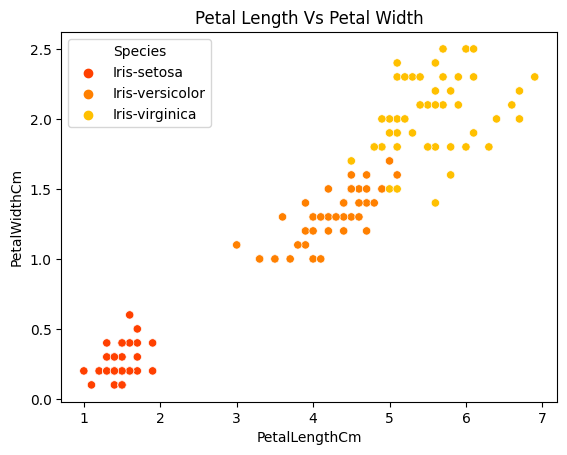

In [9]:
sb.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette='autumn')
plt.title('Petal Length Vs Petal Width')

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Petal Width Distribution</p>


Text(0.5, 1.0, 'PetalWidthCm Distribution')

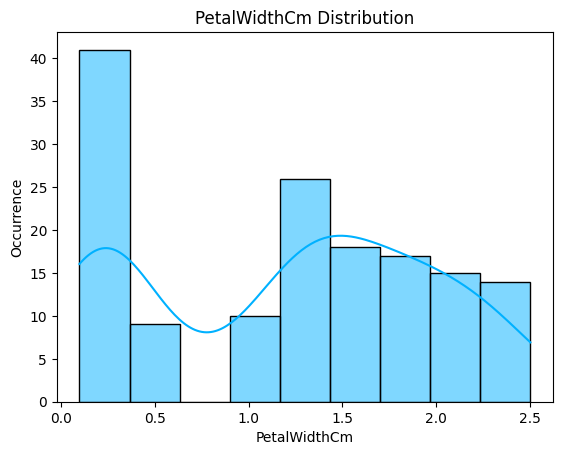

In [10]:
sb.histplot(data['PetalWidthCm'],kde=True,color=c1(0.3))
plt.ylabel('Occurrence')
plt.title('PetalWidthCm Distribution')

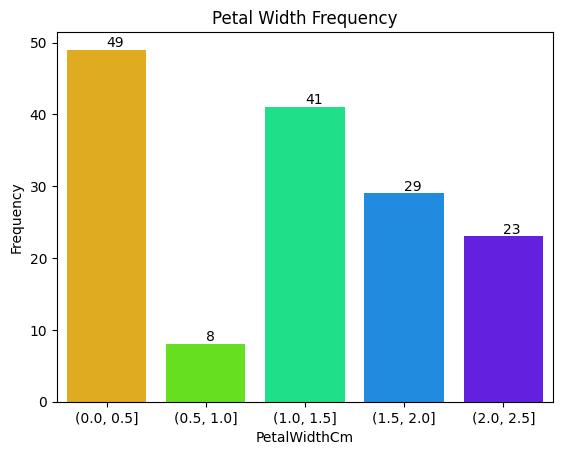

In [11]:
bins=[0,0.5,1,1.5,2,2.5]
val=pd.cut(data['PetalWidthCm'],bins=bins).value_counts()
sb.barplot(x=val.index,y=val,palette='gist_rainbow')
plt.ylabel('Frequency')
plt.title('Petal Width Frequency')
for i,j in enumerate(val.sort_index()):
    plt.text(i,j,j,va='bottom')


<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **(0-0.5) and (1-2) range Petal Width (in cm) are maximum in dataset**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Petal Length Distribution</p>


Text(0.5, 1.0, 'PetalLengthCm Distribution')

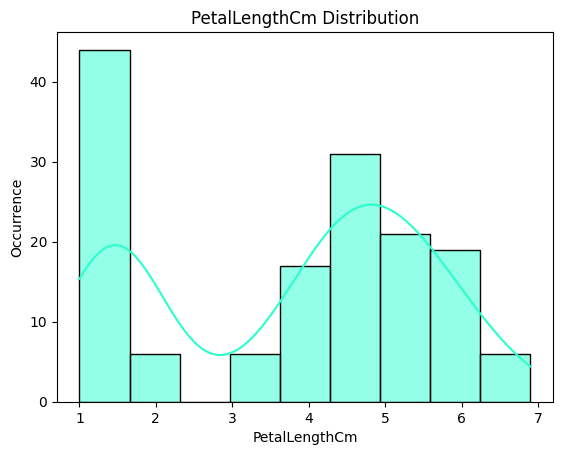

In [12]:
sb.histplot(data['PetalLengthCm'],kde=True,color=c1(0.4))
plt.ylabel('Occurrence')
plt.title('PetalLengthCm Distribution')

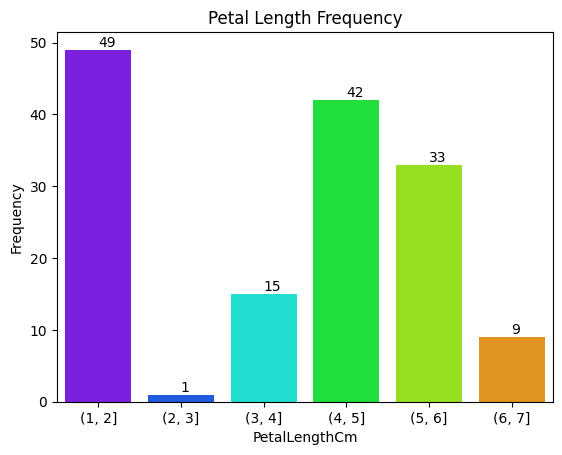

In [13]:
bins=[x for x in range(1,8)]
val=pd.cut(data['PetalLengthCm'],bins=bins).value_counts()
sb.barplot(x=val.index,y=val,palette='gist_rainbow_r')
plt.ylabel('Frequency')
plt.title('Petal Length Frequency')
for i,j in enumerate(val.sort_index()):
    plt.text(i,j,j,va='bottom')


<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **(1-2) and (4-6) range Petal Length (in cm) are maximum in dataset**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Sepal Length Distribution</p>


Text(0.5, 1.0, 'SepalLengthCm Distribution')

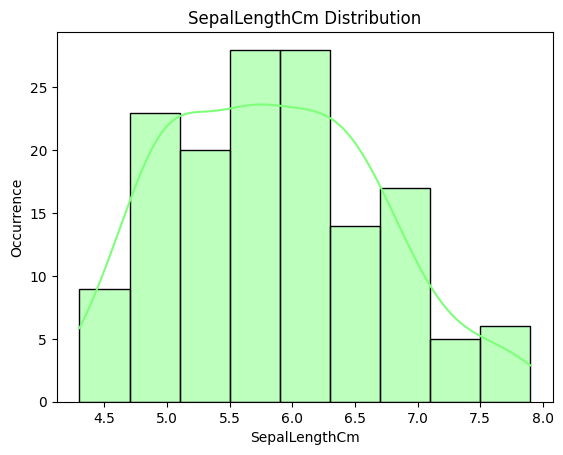

In [14]:
sb.histplot(data['SepalLengthCm'],kde=True,color=c1(0.5))
plt.ylabel('Occurrence')
plt.title('SepalLengthCm Distribution')

Text(0.5, 1.0, 'Sepal Length Frequency')

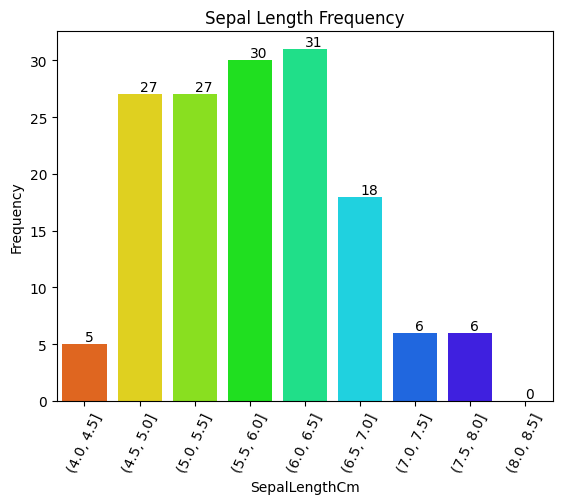

In [15]:
bins=[x for x in np.arange(4,9,0.5)]
val=pd.cut(data['SepalLengthCm'],bins=bins).value_counts()
sb.barplot(x=val.index,y=val,palette='gist_rainbow')
plt.ylabel('Frequency')

for i,j in enumerate(val.sort_index()):
    plt.text(i,j,j,va='bottom')
plt.xticks(rotation=65)
plt.title('Sepal Length Frequency')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **4-7 range sepal length (in cm) are maximum in dataset**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Sepal Width Distribution</p>


Text(0.5, 1.0, 'SepalWidthCm Distribution')

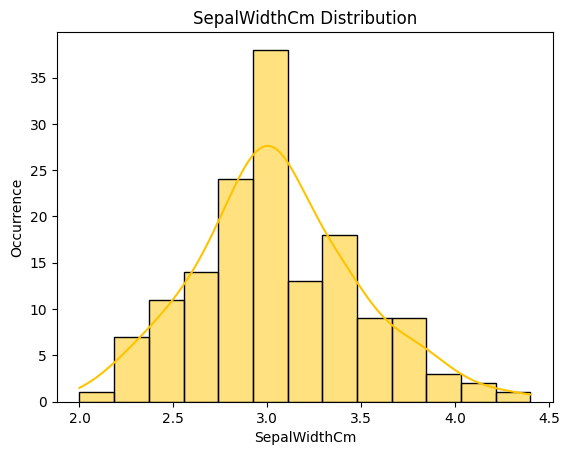

In [16]:
sb.histplot(data['SepalWidthCm'],kde=True,color=c1(0.7))
plt.ylabel('Occurrence')
plt.title('SepalWidthCm Distribution')

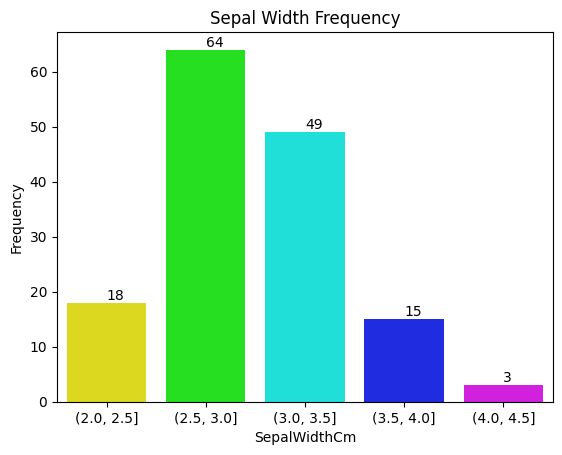

In [17]:
bins=[2,2.5,3,3.5,4,4.5]
val=pd.cut(data['SepalWidthCm'],bins=bins).value_counts()
sb.barplot(x=val.index,y=val,palette='hsv')
plt.ylabel('Frequency')
plt.title('Sepal Width Frequency')
for i,j in enumerate(val.sort_index()):
    plt.text(i,j,j,va='bottom')
    

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **2.5-3.5 range sepal width (in cm) are maximum in dataset**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Heatmap For Correlation</p>

<Axes: >

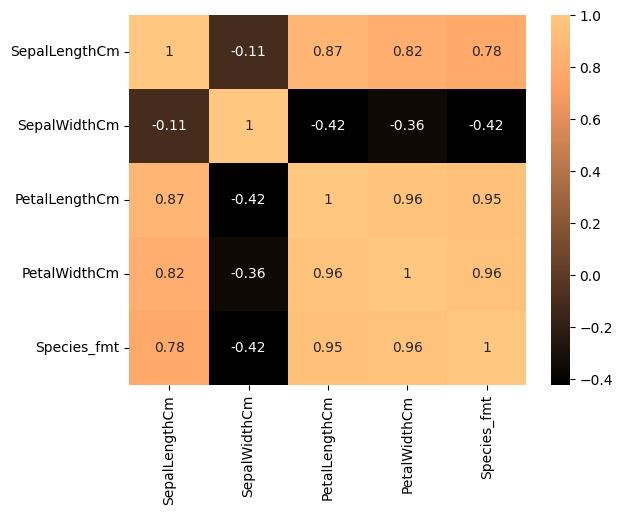

In [18]:
sb.heatmap(data=data.drop(['Species','Id'],axis=1).corr(),annot=True,cmap='copper')

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **Only Sepal Width is negatively correlated**
- **Other Features are strongly correlated with each other**

<p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: #008080; font-size: 25px; text-align: center; padding: 0px; border-bottom: 3px solid #008080;">Pair Plot</p>


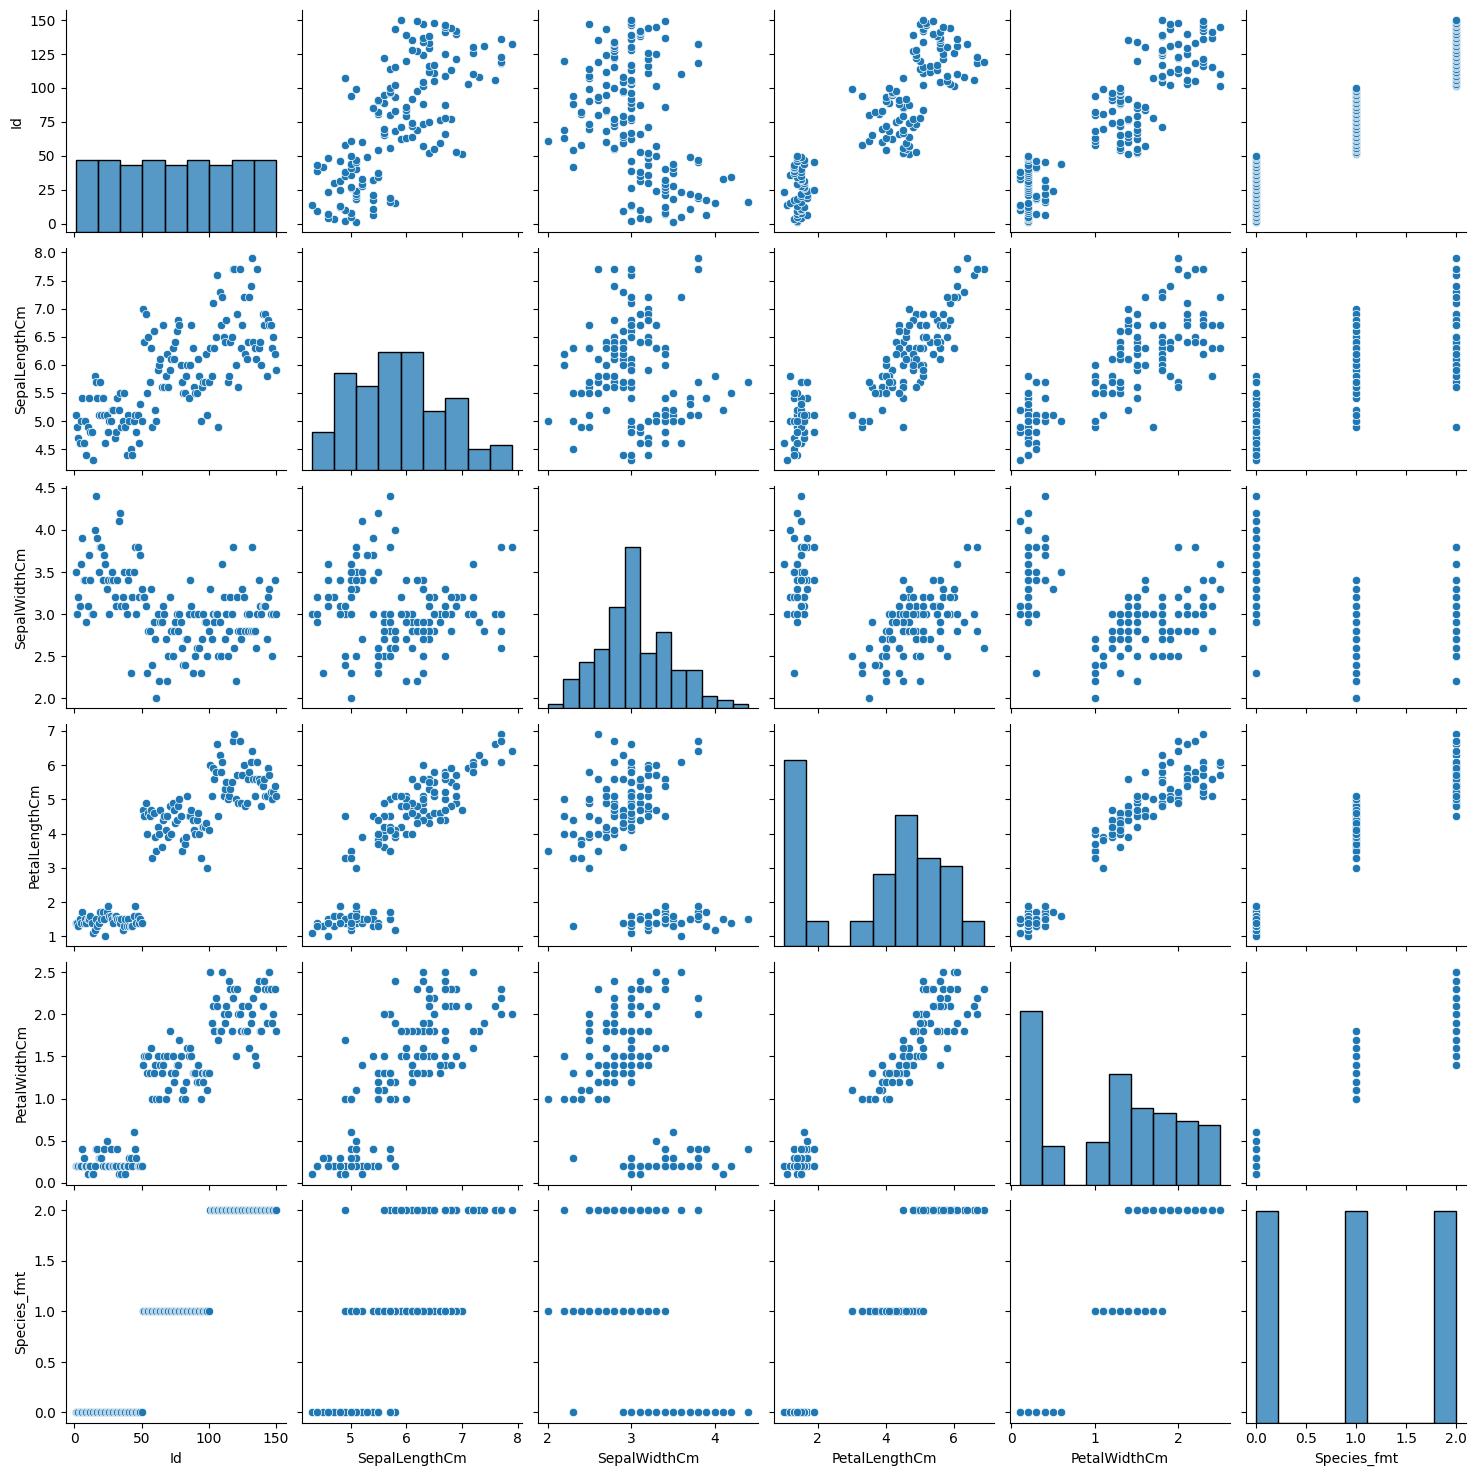

In [19]:
sb.pairplot(data=data)

<div style="border-radius:10px; border:#E57C23 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
    
    
    
    
- **Here the dataset is small.So we perform pairplot for better understanding of data**

# Thank You.Keep Kaggling